### 사전설치

https://konlpy.org/en/latest/install/#ubuntu

```
$ sudo apt-get install openjdk-8-jdk g++ python3-dev python-dev
$ pip install konlpy
```

In [1]:
## 리눅스에서 한글 설정
import pandas as pd
import numpy as np
import warnings as wr
import matplotlib
import matplotlib.font_manager
import seaborn as sns
#[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
wr.filterwarnings('ignore')

In [2]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [3]:
from konlpy.corpus import kolaw
from konlpy.tag import Kkma
from konlpy.utils import concordance

### 말뭉치
말뭉치는(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다

### 대한민국 헌법 말뭉치
KoNLPy 에서는 대한민국 헌법 말뭉치인 kolaw 와 국회법안 말뭉치인 kobill 을 제공한다

In [4]:
kolaw.fileids()[0]

'constitution.txt'

In [6]:
c = kolaw.open(kolaw.fileids()[0]).read()

In [7]:
print(c[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [9]:
# konlpy.utils.concordance(찾을 단어, 전체문장, show=False)
fword = concordance('조화', c, show=True)
fword

33	불의를 타파하며, 자율과 조화를 바탕으로 자유민주적
3646	남용을 방지하며, 경제주체간의 조화를 통한 경제의


[33, 3646]

### 분석기 및 사전 라이브러리
- Hannanum : KAIST 말뭉치를 이용해 생성된 사전
- Kkma : 세종 말뭉치를 이용해 생성된 사전
- Komoran : Java 로 쓰여진 오픈소스 한글 형태소 분석기

### 공통사항
- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착 - pos 명령을 사용하면 품사 부착을 한다

In [10]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt =Okt()

In [11]:
### 명사 추출하기
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [12]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [13]:
komoran.nouns(c[:40])

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [14]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [15]:
word = '반갑습니다. 오늘은 텍스트 분석 수업입니다. 재미있네요~~'

In [16]:
# 문장 단위로 검색하기
word_sentence = kkma.sentences(word) #문장 분석
word_sentence

['반갑습니다.', '오늘은 텍스트 분석 수업입니다.', '재미있네요~~']

In [17]:
kkma.nouns(word)

['오늘', '텍스트', '분석', '수업']

In [18]:
kkma.morphs(word,) #형태소 추출

['반갑',
 '습니다',
 '.',
 '오늘',
 '은',
 '텍스트',
 '분석',
 '수업',
 '이',
 'ㅂ니다',
 '.',
 '재미있',
 '네요',
 '~~']

In [19]:
kkma.pos(word)

[('반갑', 'VA'),
 ('습니다', 'EFN'),
 ('.', 'SF'),
 ('오늘', 'NNG'),
 ('은', 'JX'),
 ('텍스트', 'NNG'),
 ('분석', 'NNG'),
 ('수업', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('네요', 'EFN'),
 ('~~', 'SW')]

In [20]:
# Hannanum 해보기
hannanum.nouns(word)

['오늘', '텍스트', '분석', '수업']

In [21]:
hannanum.analyze(word)

[[[('반갑', 'paa'), ('습니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('오늘', 'ncn'), ('은', 'jxc')], [('오늘', 'ncn'), ('은', 'ncn')]],
 [[('텍스트', 'ncn')]],
 [[('분석', 'ncpa')]],
 [[('수업', 'ncpa'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]],
 [],
 [[('재미있', 'pvg'), ('네요', 'ef'), ('~', 'sd'), ('~', 'sd')],
  [('재미있', 'pvg'), ('네', 'ef'), ('요', 'jxf'), ('~', 'sd'), ('~', 'sd')],
  [('재미', 'ncn'), ('있', 'xsmn'), ('네요', 'ef'), ('~', 'sd'), ('~', 'sd')],
  [('재미', 'ncn'),
   ('있', 'xsmn'),
   ('네', 'ef'),
   ('요', 'jxf'),
   ('~', 'sd'),
   ('~', 'sd')]]]

In [22]:
hannanum.pos(word)

[('반갑', 'P'),
 ('습니다', 'E'),
 ('.', 'S'),
 ('오늘', 'N'),
 ('은', 'J'),
 ('텍스트', 'N'),
 ('분석', 'N'),
 ('수업', 'N'),
 ('이', 'J'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('재미있', 'P'),
 ('네요', 'E'),
 ('~~', 'S')]

In [26]:
#Okt
print(okt.nouns(word))
print(okt.morphs(word))
print(okt.pos(word))

['오늘', '텍스트', '분석', '수업']
['반갑습니다', '.', '오늘', '은', '텍스트', '분석', '수업', '입니다', '.', '재미있네요', '~~']
[('반갑습니다', 'Adjective'), ('.', 'Punctuation'), ('오늘', 'Noun'), ('은', 'Josa'), ('텍스트', 'Noun'), ('분석', 'Noun'), ('수업', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('재미있네요', 'Adjective'), ('~~', 'Punctuation')]


In [28]:
word2 = "정말 재미가 있네욬ㅋㅋㅋㅋㅋㅋㅋ 이제정말로된나여ㅎㅎㅎㅎ?"

In [30]:
okt.pos(word2)

[('정말', 'Noun'),
 ('재미', 'Noun'),
 ('가', 'Josa'),
 ('있네욬', 'Noun'),
 ('ㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle'),
 ('이제정', 'Noun'),
 ('말로', 'Noun'),
 ('된나여', 'Verb'),
 ('ㅎㅎㅎㅎ', 'KoreanParticle'),
 ('?', 'Punctuation')]

In [32]:
okt.pos(word2, norm=True)
# '있네욬'이 '있네요'로

[('정말', 'Noun'),
 ('재미', 'Noun'),
 ('가', 'Josa'),
 ('있네요', 'Adjective'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 ('이제정', 'Noun'),
 ('말로', 'Noun'),
 ('된나여', 'Verb'),
 ('ㅎㅎㅎ', 'KoreanParticle'),
 ('?', 'Punctuation')]

In [34]:
okt.pos(word2, norm=True, stem=True)

[('정말', 'Noun'),
 ('재미', 'Noun'),
 ('가', 'Josa'),
 ('있다', 'Adjective'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 ('이제정', 'Noun'),
 ('말로', 'Noun'),
 ('되다', 'Verb'),
 ('ㅎㅎㅎ', 'KoreanParticle'),
 ('?', 'Punctuation')]

In [35]:
okt.pos(word2, norm=True, stem=True, join=True) # 리스트로 변환

['정말/Noun',
 '재미/Noun',
 '가/Josa',
 '있다/Adjective',
 'ㅋㅋㅋ/KoreanParticle',
 '이제정/Noun',
 '말로/Noun',
 '되다/Verb',
 'ㅎㅎㅎ/KoreanParticle',
 '?/Punctuation']

In [36]:
# morphs(구문, norm=False, stem=False)
okt.morphs(word2 , norm=True, stem=True)

['정말', '재미', '가', '있다', 'ㅋㅋㅋ', '이제정', '말로', '되다', 'ㅎㅎㅎ', '?']

In [37]:
c = kolaw.open(kolaw.fileids()[0]).read()

In [42]:
okt.nouns(c)

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제',
 '장',
 '강',
 '제',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '제',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '정',
 '국가',
 '법률',
 '정',
 '바',
 '재외국민',
 '보호',
 '의무',
 '제',
 '대한민국',
 '영토',
 '한반도',
 '그',
 '부속',
 '도서',
 '제',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '제',
 '대한민국',
 '국제',
 '평화',
 '

In [38]:
from nltk import Text
kolaw = Text(okt.nouns(c), name='Kolaw')
type(kolaw)

nltk.text.Text

In [39]:
kolaw.vocab()

FreqDist({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, ...})

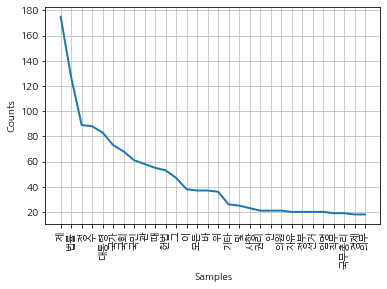

In [41]:
kolaw.plot(30)
plt.show()

In [45]:
# 불용어 처리하기
stop_words = ['제', '정', '수', '관', '때', '를', '위', '바', '및', '입', '그', '이', '.', '(', ')', '-']

ko = okt.nouns(c)

In [46]:
ko = [x for x in ko if x not in stop_words]
ko[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

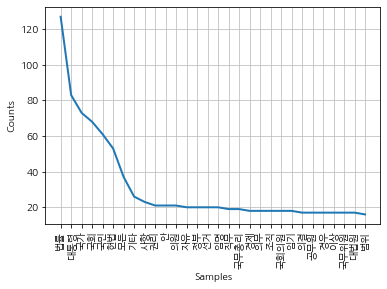

In [47]:
from nltk import Text
kolaw = Text(ko, name ='Kolaw')
type(kolaw)
kolaw.plot(30)
plt.show()

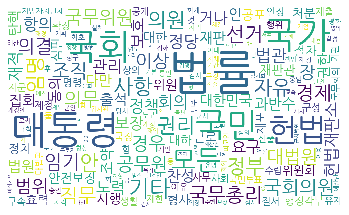

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", 
font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()